# Шифр Белазо
Импорты, алфавит и ключ

In [16]:
from colorama import Fore as text_color
from utils.validation import validate_string_key

alphabet = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
key = validate_string_key(input('Введите ключ: '))

ValueError: Введенный ключ имеет длину меньше 1

Функция шифрования

In [10]:
def belaso(string: str, alphabet: str = alphabet, key: str = 'КЛЮЧ') -> str:
    string = string.upper()
    alphabet = alphabet.upper()
    
    # Удлинение ключа ровно под длину открытого текста
    key = (key * (len(string) // len(key)) + key[:(len(string) % len(key))]).upper()
    
    new_str = ''
    for i in range(len(string)):
        new_str += alphabet[(alphabet.index(string[i]) + alphabet.index(key[i])) % len(alphabet)]
    return new_str

Функция расшифрования

In [11]:
def belaso_decrypt(string: str, alphabet: str = alphabet, key: str = 'КЛЮЧ') -> str:
    string = string.upper()
    alphabet = alphabet.upper()
    
    # Удлинение ключа ровно под длину открытого текста
    key = (key * (len(string) // len(key)) + key[:(len(string) % len(key))]).upper()
    
    new_str = ''
    for i in range(len(string)):
        new_str += alphabet[(alphabet.index(string[i]) - alphabet.index(key[i])) % len(alphabet)]
    return new_str

Проверка

In [12]:
try:
    open_text = 'НЕВСЕТЕПОВАРАЗПТЧТОСДЛИННЫМИНОЖАМИХОДЯТТЧК'
    encrypted_text = belaso(open_text, key=key)
    decrypted_text = belaso_decrypt(encrypted_text, key=key)

    assert encrypted_text == 'ЮШГТУДЕАБГБЮТЗАЕШУЬГДЬЫООЙЮИЮБЗБЪЪХЯЧАУАЙК', 'Зашифрованный текст не совпадает с образцом'
    assert open_text == decrypted_text, 'Расшифрованный текст не совпадает с изначальным'
    print(f'{text_color.LIGHTGREEN_EX}Шифрование корректно{text_color.RESET}')
except AssertionError as e:
    print(f'{text_color.LIGHTRED_EX}Шифрование не корректно: {e}{text_color.RESET}')

Шифрование не корректно: Зашифрованный текст не совпадает с образцом


Сравнение гистограмм до шифрования и после

Открытый текст


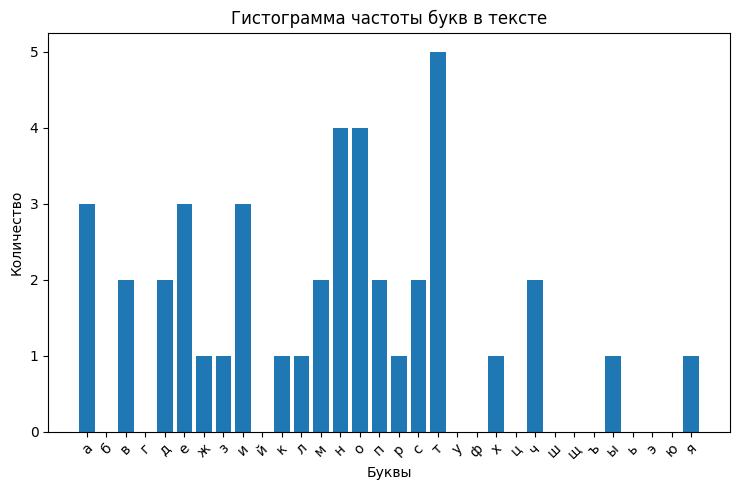

Зашифрованный текст


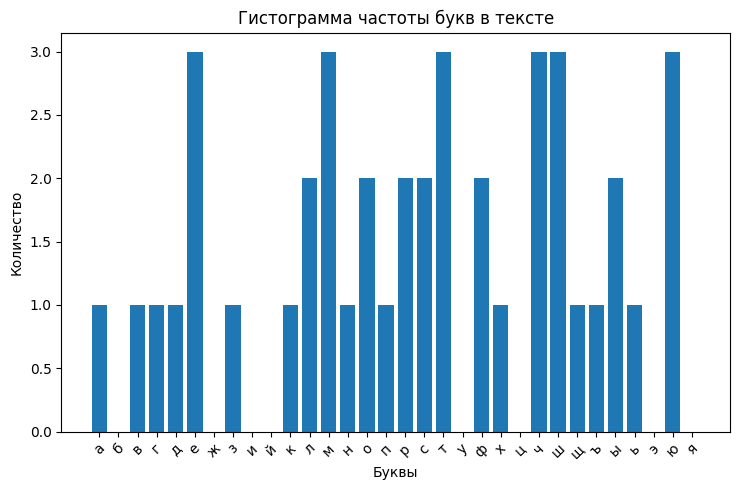

In [13]:
from utils.gist import plot_letter_count

print('Открытый текст')
plot_letter_count(open_text)
print('Зашифрованный текст')
plot_letter_count(encrypted_text)

Ввод строки для шифрования

In [14]:
open_text = input('Введите открытый текст для шифрования: ')
encrypted_text = belaso(open_text, key=key)
print(encrypted_text)

МБОНД


Ввод строки для расшифрования

In [15]:
encrypted_text = input('Введите текст для расшифрования: ')
decrypted_text = belaso_decrypt(encrypted_text, key=key)
print(decrypted_text)

АБВГД
